<a href="https://colab.research.google.com/github/salonirohil/Task1-Data-Science-Internship/blob/main/task3_Data_Science_Internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [ ]:
# Load the dataset
file_path = '/content/IRIS.csv'
iris_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
iris_df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Check for missing values
print(iris_df.isnull().sum())




sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [ ]:


# Summary statistics
print(iris_df.describe())




       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [ ]:


# Check the distribution of the target variable
print(iris_df['species'].value_counts())


species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


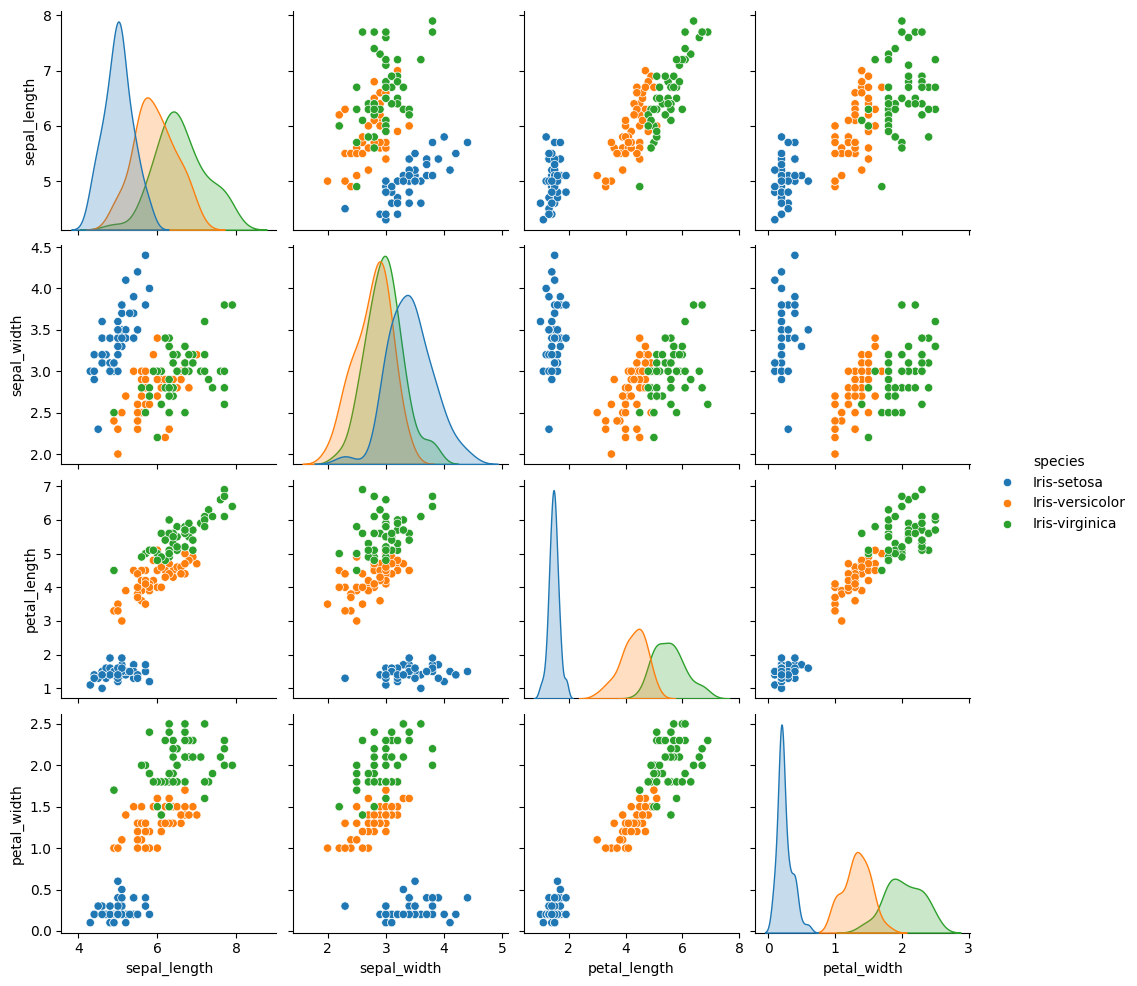

In [ ]:
# Pairplot
sns.pairplot(iris_df, hue='species')
plt.show()




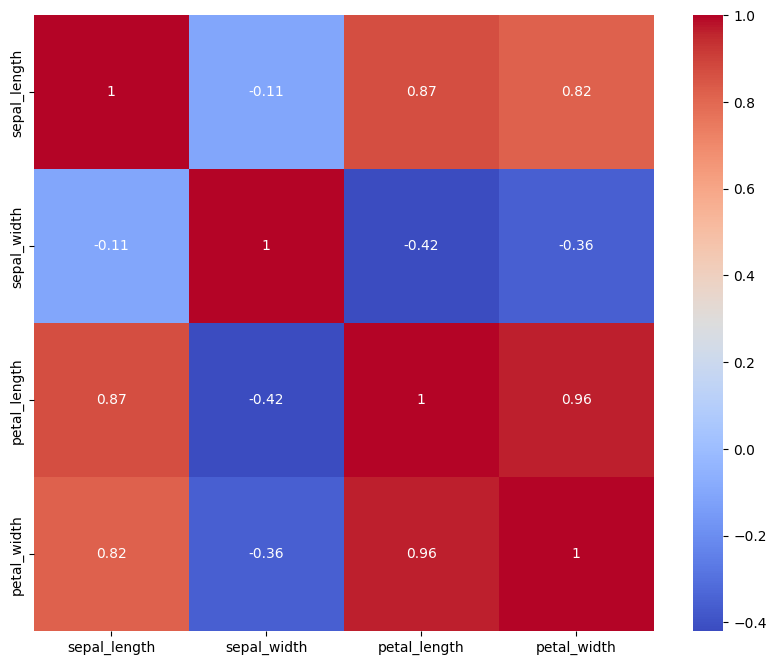

In [ ]:
# Heatmap of the correlations
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation calculation
numeric_df = iris_df.select_dtypes(include=['float', 'int'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Encode the target variable
iris_df['species'] = iris_df['species'].astype('category').cat.codes




In [ ]:
# Split the dataset into features and target variable
X = iris_df.drop('species', axis=1)
y = iris_df['species']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
# Train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predict on the test data
y_pred = knn.predict(X_test)

In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
# Print the accuracy score
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Accuracy: 100.00%


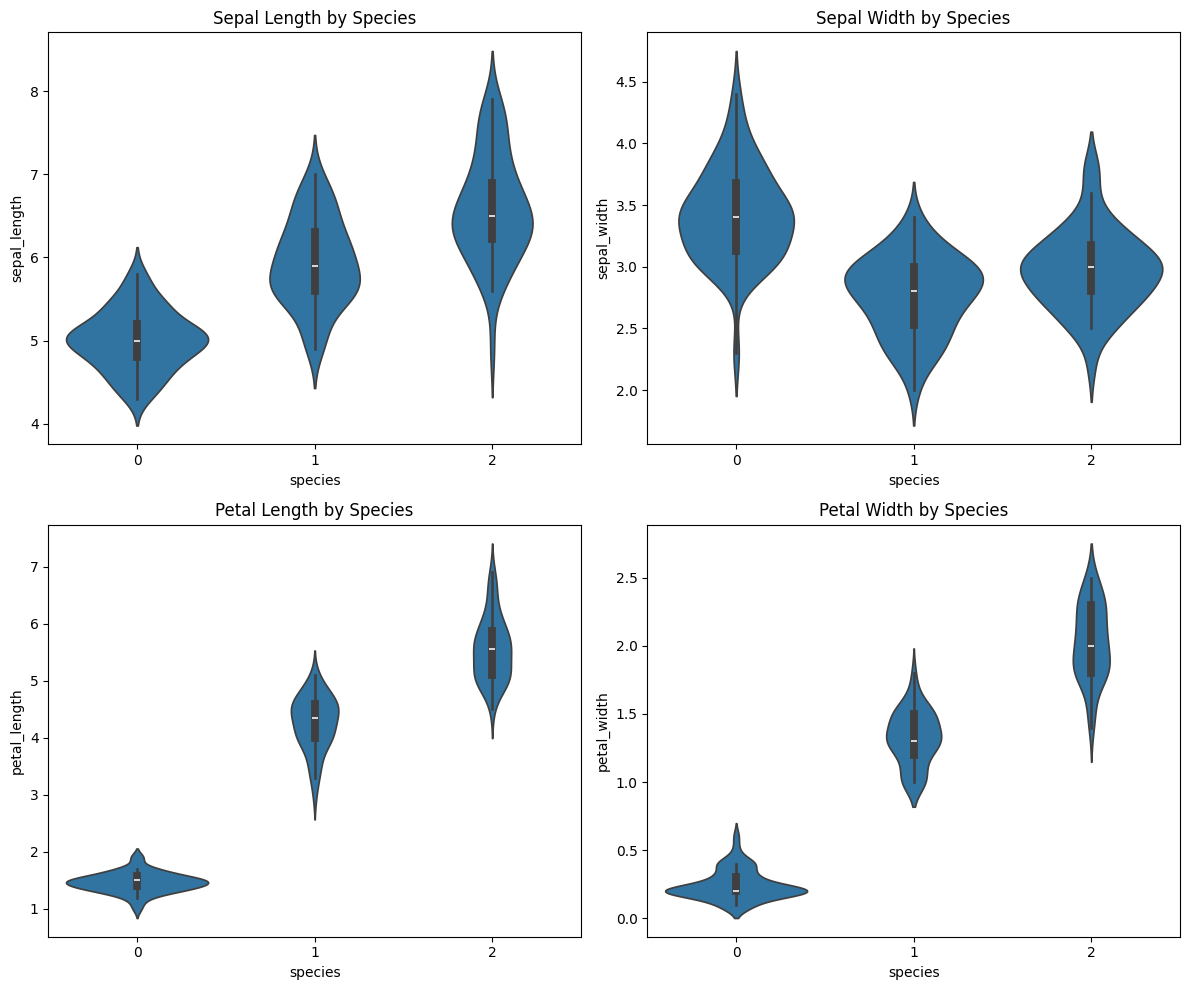

In [ ]:
plt.figure(figsize=(12, 10))

# Sepal length
plt.subplot(2, 2, 1)
sns.violinplot(x='species', y='sepal_length', data=iris_df)
plt.title('Sepal Length by Species')

# Sepal width
plt.subplot(2, 2, 2)
sns.violinplot(x='species', y='sepal_width', data=iris_df)
plt.title('Sepal Width by Species')

# Petal length
plt.subplot(2, 2, 3)
sns.violinplot(x='species', y='petal_length', data=iris_df)
plt.title('Petal Length by Species')

# Petal width
plt.subplot(2, 2, 4)
sns.violinplot(x='species', y='petal_width', data=iris_df)
plt.title('Petal Width by Species')

plt.tight_layout()
plt.show()


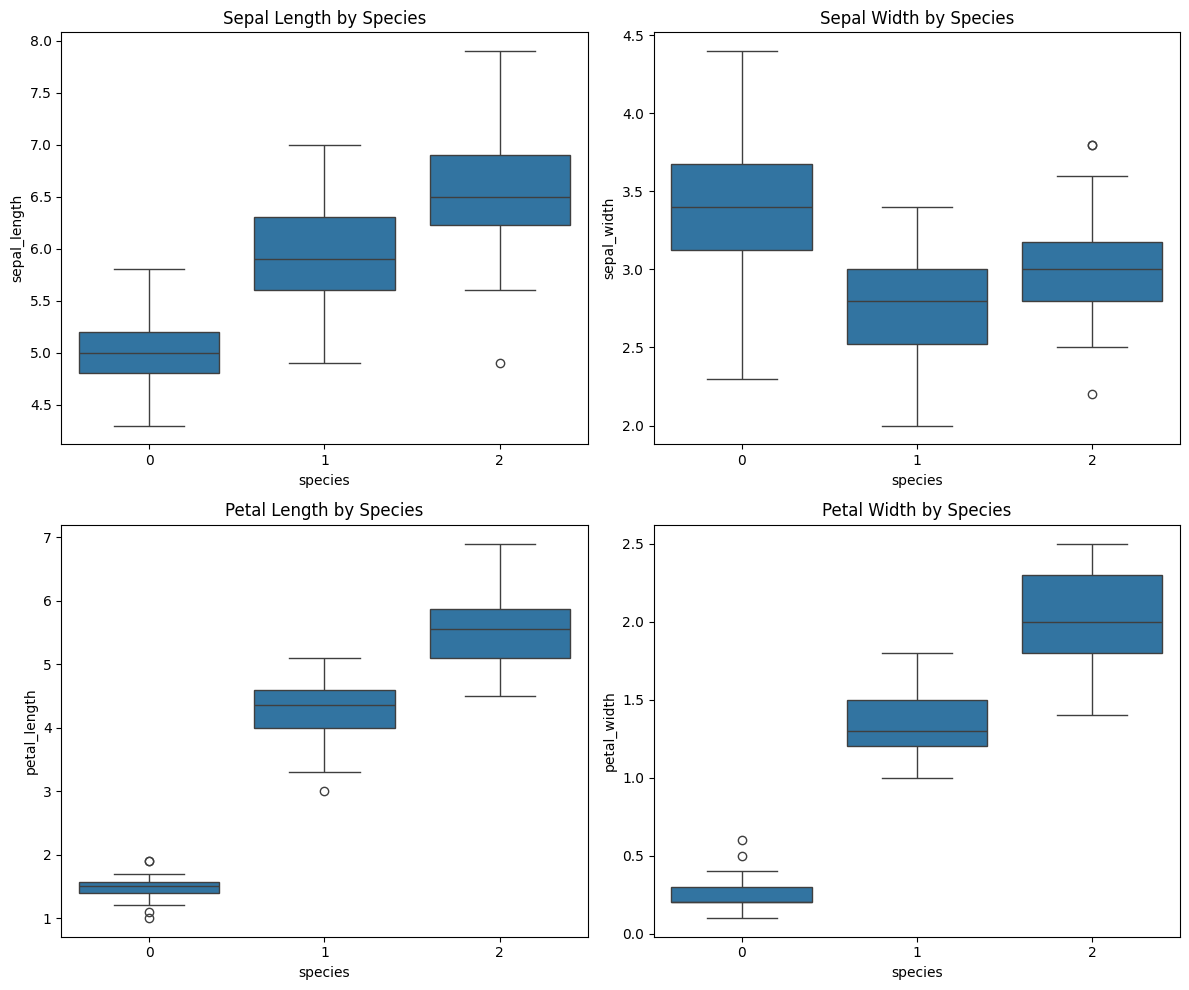

In [ ]:
plt.figure(figsize=(12, 10))

# Sepal length
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='sepal_length', data=iris_df)
plt.title('Sepal Length by Species')

# Sepal width
plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='sepal_width', data=iris_df)
plt.title('Sepal Width by Species')

# Petal length
plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='petal_length', data=iris_df)
plt.title('Petal Length by Species')

# Petal width
plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='petal_width', data=iris_df)
plt.title('Petal Width by Species')

plt.tight_layout()
plt.show()


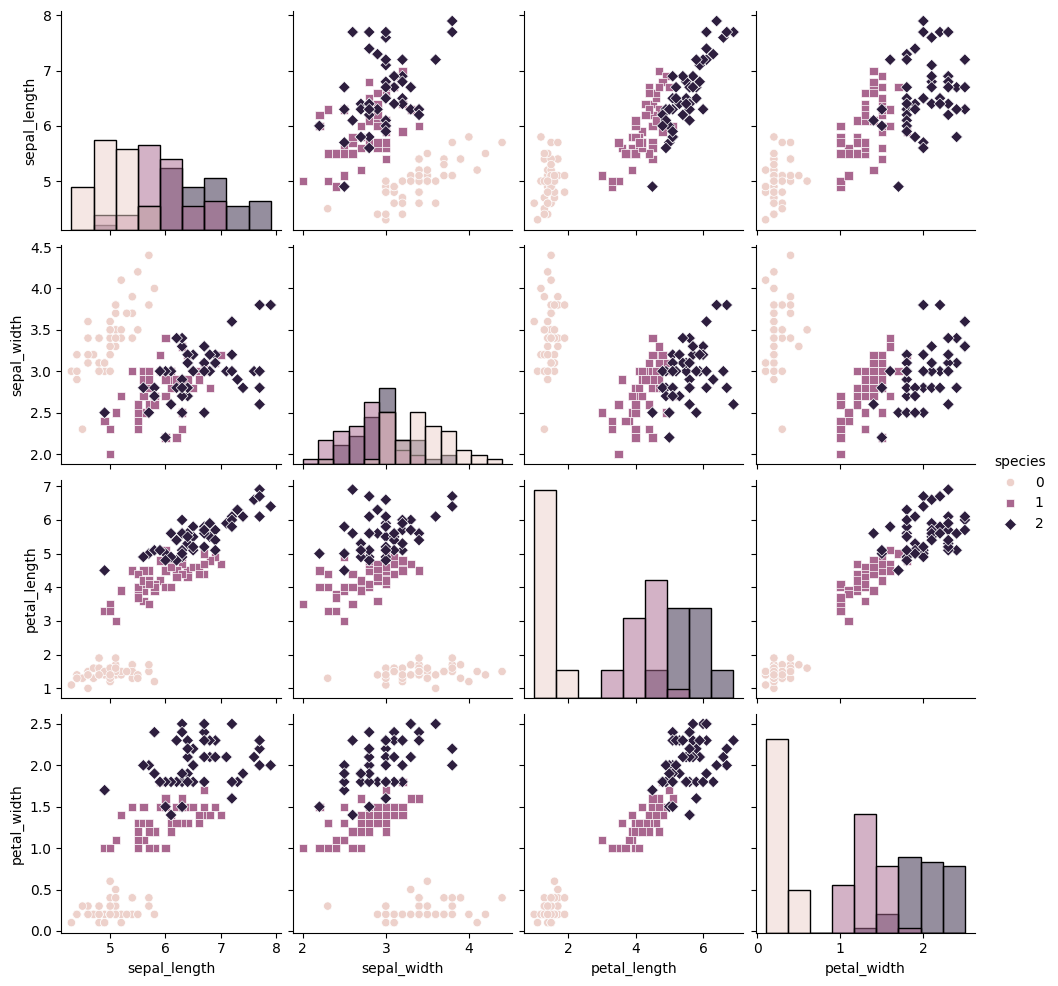

In [ ]:
# Scatterplot matrix
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"], diag_kind="hist")
plt.show()


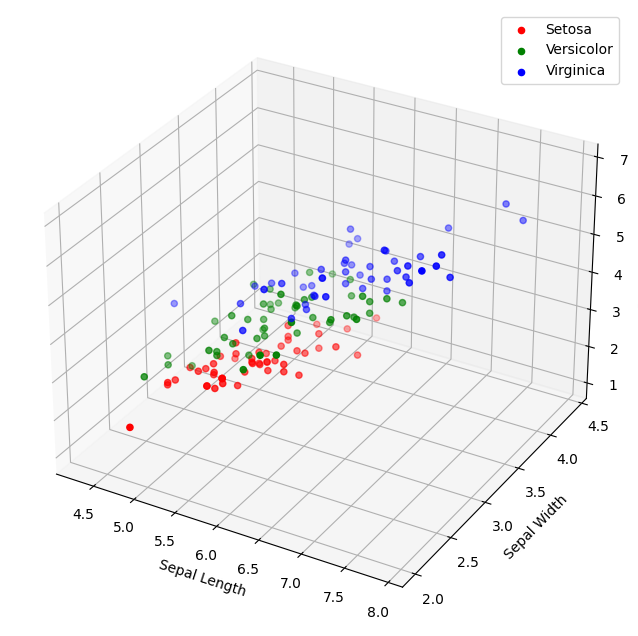

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(iris_df[iris_df['species'] == 0]['sepal_length'],
           iris_df[iris_df['species'] == 0]['sepal_width'],
           iris_df[iris_df['species'] == 0]['petal_length'],
           color='r', label='Setosa')

ax.scatter(iris_df[iris_df['species'] == 1]['sepal_length'],
           iris_df[iris_df['species'] == 1]['sepal_width'],
           iris_df[iris_df['species'] == 1]['petal_length'],
           color='g', label='Versicolor')

ax.scatter(iris_df[iris_df['species'] == 2]['sepal_length'],
           iris_df[iris_df['species'] == 2]['sepal_width'],
           iris_df[iris_df['species'] == 2]['petal_length'],
           color='b', label='Virginica')

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.legend()
plt.show()
